<a href="https://colab.research.google.com/github/Lesiazhou/QM2/blob/main/Simple_Water_Inflow_vs_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calendar Average Two River inflow vs Calendar Year NDVI**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np

pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

from google.colab import files
uploaded = files.upload()

Saving Calendar_Average_Waterinflow.csv to Calendar_Average_Waterinflow.csv


In [26]:
df_waterinflow=pd.read_csv('Calendar_Average_Waterinflow.csv')
df_waterinflow = df_waterinflow.iloc[0:].reset_index(drop=True)
df_waterinflow.head(10)

,year,syr_darya_avg,amu_darya_avg
0,1982,7.930878,7.628830
1,1983,10.294051,9.107671
2,1984,9.014641,7.629684
3,1985,6.899465,8.625245
4,1986,7.877845,7.084521
5,1987,7.107907,6.622555
6,1988,6.207948,5.534987
7,1989,5.111244,4.690054
8,1990,5.903941,4.389728
9,1991,7.498558,5.616005


# 1. Summary Statistics

In [27]:
summary=df_waterinflow.describe().round(2)
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
year,23.0,1993.00,6.78,1982.00,1987.50,1993.00,1998.50,2004.00
syr_darya_avg,23.0,7.58,1.63,5.11,6.34,7.50,8.30,11.35
amu_darya_avg,23.0,6.27,1.32,4.11,5.42,6.03,7.14,9.11


In [4]:
from google.colab import files
uploaded = files.upload()

Saving ndvi_calendar_part1.csv to ndvi_calendar_part1.csv


In [24]:
import pandas as pd

water_delivery_df = df_waterinflow
ndvi_df = pd.read_csv('ndvi_calendar_part1.csv',index_col=0)
ndvi_df.head(5)

,Year,NDVI
0,1982,0.090632
1,1983,0.093746
2,1984,0.087002
3,1985,0.089661
4,1986,0.082829


In [28]:
df_waterinflow.rename(columns={'year': 'Year'}, inplace=True)
merged_df = pd.merge(df_waterinflow, ndvi_df, on="Year")
merged_df.head(10)

,Year,syr_darya_avg,amu_darya_avg,NDVI
0,1982,7.930878,7.628830,0.090632
1,1983,10.294051,9.107671,0.093746
2,1984,9.014641,7.629684,0.087002
3,1985,6.899465,8.625245,0.089661
4,1986,7.877845,7.084521,0.082829
5,1987,7.107907,6.622555,0.090683
6,1988,6.207948,5.534987,0.072781
7,1989,5.111244,4.690054,0.068782
8,1990,5.903941,4.389728,0.085278
9,1991,7.498558,5.616005,0.087681


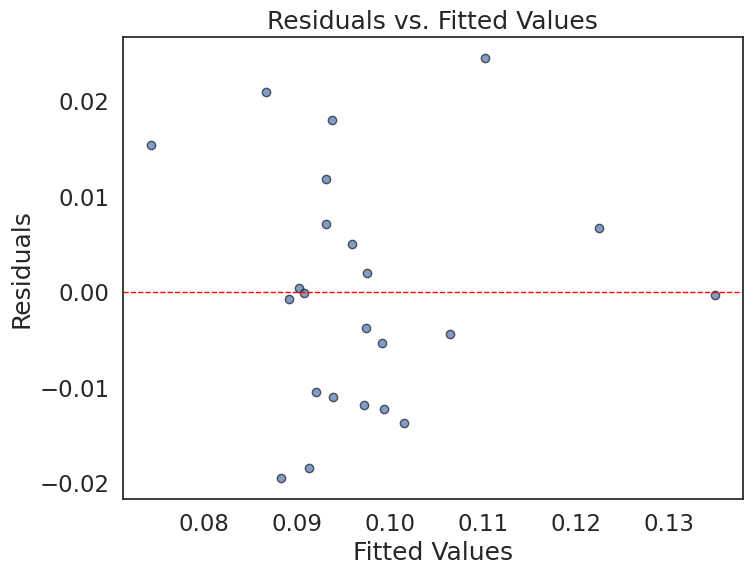

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = merged_df[['syr_darya_avg', 'amu_darya_avg']]
y = merged_df['NDVI']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

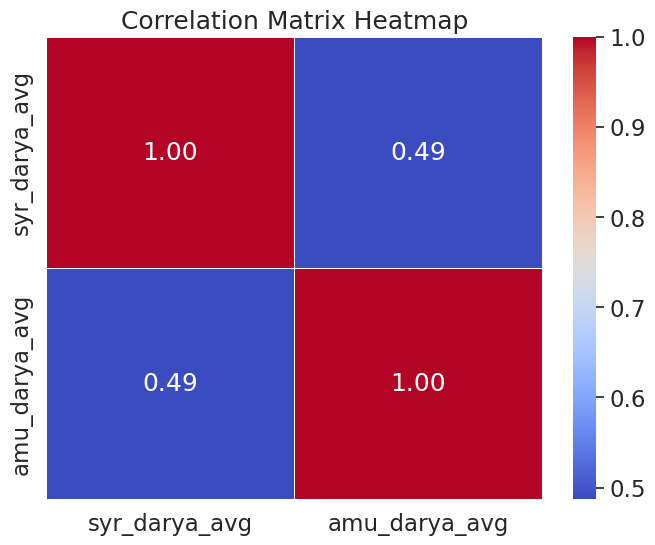

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['syr_darya_avg', 'amu_darya_avg']

correlation_matrix = merged_df[variables].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
Amudarya_Average = df_waterinflow['amu_darya_avg']
Syrdarya_Average= df_waterinflow['syr_darya_avg']
NDVI=merged_df['NDVI']

model = ols('NDVI ~ Amudarya_Average + Syrdarya_Average ', data=merged_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     9.890
Date:                Sun, 19 Jan 2025   Prob (F-statistic):            0.00103
Time:                        18:23:58   Log-Likelihood:                 68.888
No. Observations:                  23   AIC:                            -131.8
Df Residuals:                      20   BIC:                            -128.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0801      0.015  

The coefficient for Amudarya_Average is -0.0074, indicating a significant negative relationship with NDVI (p = 0.006).

The coefficient for Syrdarya_Average is 0.0084, indicating a significant positive relationship with NDVI (p = 0.000).

The R-squared value is 0.497, suggesting that the model explains 49.7% of the variation in NDVI. The overall model is significant (F-statistic p = 0.00103), demonstrating a moderate fit.

The results suggest that changes in river inflow from Amudarya and Syrdarya have contrasting effects on NDVI, with Amudarya inflow decreasing it and Syrdarya inflow increasing it.

# **Seasonal Average Two River inflow vs Seasonal Year NDVI**

In [19]:
from google.colab import files
uploaded = files.upload()

Saving Seasonal_Average_Waterinflow.csv to Seasonal_Average_Waterinflow.csv


In [31]:
df_waterinflow=pd.read_csv('Seasonal_Average_Waterinflow.csv')
df_waterinflow = df_waterinflow.iloc[0:].reset_index(drop=True)
df_waterinflow.head(10)

,seasonyear,syr_darya_avg,amu_darya_avg
0,1982,8.501196,7.918685
1,1983,9.447739,8.756421
2,1984,9.707584,7.841784
3,1985,7.650856,8.582855
4,1986,7.337832,7.117114
5,1987,7.086967,6.898218
6,1988,6.490643,5.514583
7,1989,5.547190,5.213038
8,1990,5.760329,3.953556
9,1991,6.105387,5.518791


In [21]:
summary=df_waterinflow.describe().round(2)
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
seasonyear,23.0,1993.00,6.78,1982.00,1987.50,1993.00,1998.50,2004.00
syr_darya_avg,23.0,7.59,1.46,5.55,6.54,7.34,8.05,11.52
amu_darya_avg,23.0,6.31,1.25,3.95,5.33,6.18,7.10,8.76


In [22]:
from google.colab import files
uploaded = files.upload()

Saving ndvi_seasonal_part1.csv to ndvi_seasonal_part1.csv


In [29]:
df_waterinflow.rename(columns={'year': 'Year'}, inplace=True)
merged_df = pd.merge(df_waterinflow, ndvi_df, on="Year")
merged_df.head(10)

,Year,syr_darya_avg,amu_darya_avg,NDVI
0,1982,7.930878,7.628830,0.090632
1,1983,10.294051,9.107671,0.093746
2,1984,9.014641,7.629684,0.087002
3,1985,6.899465,8.625245,0.089661
4,1986,7.877845,7.084521,0.082829
5,1987,7.107907,6.622555,0.090683
6,1988,6.207948,5.534987,0.072781
7,1989,5.111244,4.690054,0.068782
8,1990,5.903941,4.389728,0.085278
9,1991,7.498558,5.616005,0.087681


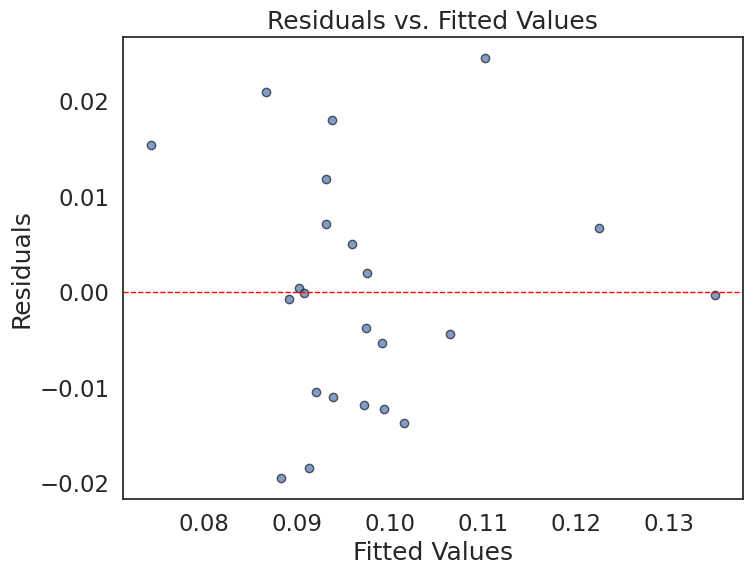

In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = merged_df[['syr_darya_avg', 'amu_darya_avg']]
y = merged_df['NDVI']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

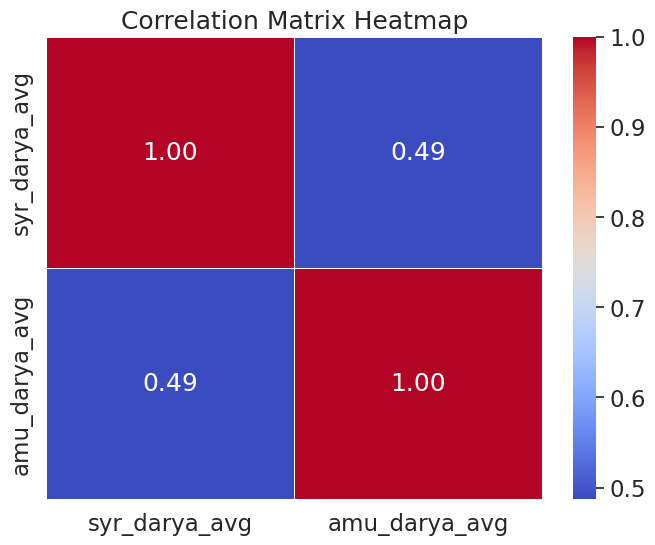

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['syr_darya_avg', 'amu_darya_avg']

correlation_matrix = merged_df[variables].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
Amudarya_Average = df_waterinflow['amu_darya_avg']
Syrdarya_Average= df_waterinflow['syr_darya_avg']
NDVI=merged_df['NDVI']

model = ols('NDVI ~ Amudarya_Average + Syrdarya_Average ', data=merged_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     7.660
Date:                Sun, 19 Jan 2025   Prob (F-statistic):            0.00339
Time:                        18:36:51   Log-Likelihood:                 67.521
No. Observations:                  23   AIC:                            -129.0
Df Residuals:                      20   BIC:                            -125.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0790      0.018  

The coefficient for Amudarya_Average is -0.0069, indicating a significant negative relationship with NDVI (p = 0.014).
The coefficient for Syrdarya_Average is 0.0081, indicating a significant positive relationship with NDVI (p = 0.001).
The R-squared value is 0.434, suggesting that the model explains 43.4% of the variation in NDVI. The overall model is significant (F-statistic p = 0.00339), demonstrating a moderate fit.

The results suggest that changes in river inflow from Amudarya and Syrdarya have contrasting effects on NDVI, with Amudarya inflow decreasing it and Syrdarya inflow increasing it.









# **Two Rivers Water Inflow from Growing and Non-Growing Season vs Seasonal NDVI**








In [35]:
from google.colab import files
uploaded = files.upload()

Saving rivers_seasonal_split.csv to rivers_seasonal_split.csv


In [37]:
df_waterinflow=pd.read_csv('rivers_seasonal_split.csv')
df_waterinflow = df_waterinflow.iloc[0:].reset_index(drop=True)
df_waterinflow.head(10)

,Seasonal Year,Amu Darya Non-growing,Amu Darya Growing,Syr Darya Non-growing,Syr Darya Growing
0,1982,8.561667,7.275000,10.123333,6.885000
1,1983,8.949379,8.565000,11.155000,7.743333
2,1984,8.590000,7.088333,11.146667,8.268333
3,1985,8.875000,8.291667,9.580000,5.720000
4,1986,7.646667,6.583333,7.868333,6.801667
5,1987,7.653304,6.145000,8.496667,5.676667
6,1988,5.716667,5.313333,8.361667,4.625000
7,1989,5.974373,4.448333,6.820000,4.298333
8,1990,4.048333,3.858333,6.845000,4.675000
9,1991,6.014889,5.021667,7.533333,4.681667


In [38]:
summary=df_waterinflow.describe().round(2)
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
Seasonal Year,23.0,1993.00,6.78,1982.00,1987.50,1993.00,1998.50,2004.00
Amu Darya Non-growing,23.0,6.51,1.52,4.05,5.33,6.01,7.68,8.95
Amu Darya Growing,23.0,6.10,1.44,3.53,5.21,6.02,6.99,9.10
Syr Darya Non-growing,23.0,8.90,1.90,5.28,7.52,9.47,10.07,12.82
Syr Darya Growing,23.0,6.30,1.72,4.30,4.74,5.90,6.96,10.22


In [39]:
from google.colab import files
uploaded = files.upload()

Saving ndvi_seasonal_part1.csv to ndvi_seasonal_part1 (1).csv


In [47]:
water_delivery_df = df_waterinflow
ndvi_df = pd.read_csv('ndvi_seasonal_part1.csv',index_col=0)
ndvi_df.head(5)

,SeasonYear,NDVI
0,1982,0.095647
1,1983,0.093862
2,1984,0.094137
3,1985,0.081850
4,1986,0.087124


In [59]:
df_waterinflow.rename(columns={'Seasonal Year': 'Years'}, inplace=True)
df_waterinflow.rename(columns={'Years': 'Year'}, inplace=True)
ndvi_df.rename(columns={'SeasonYear': 'Year'}, inplace=True)
merged_df = pd.merge(df_waterinflow, ndvi_df, on="Year")
merged_df.head(5)

,Year,Amu Darya Non-growing,Amu Darya Growing,Syr Darya Non-growing,Syr Darya Growing,NDVI
0,1982,8.561667,7.275000,10.123333,6.885000,0.095647
1,1983,8.949379,8.565000,11.155000,7.743333,0.093862
2,1984,8.590000,7.088333,11.146667,8.268333,0.094137
3,1985,8.875000,8.291667,9.580000,5.720000,0.081850
4,1986,7.646667,6.583333,7.868333,6.801667,0.087124


1. Independence

The dataset is arranged in chronological order, which introduces the possibility of time dependence. This could affect the assumption of residual independence, as residuals may exhibit autocorrelation, particularly between adjacent years.
To address this issue and account for potential time-related effects,*** a panel regression analysis*** will be conducted in subsequent steps.

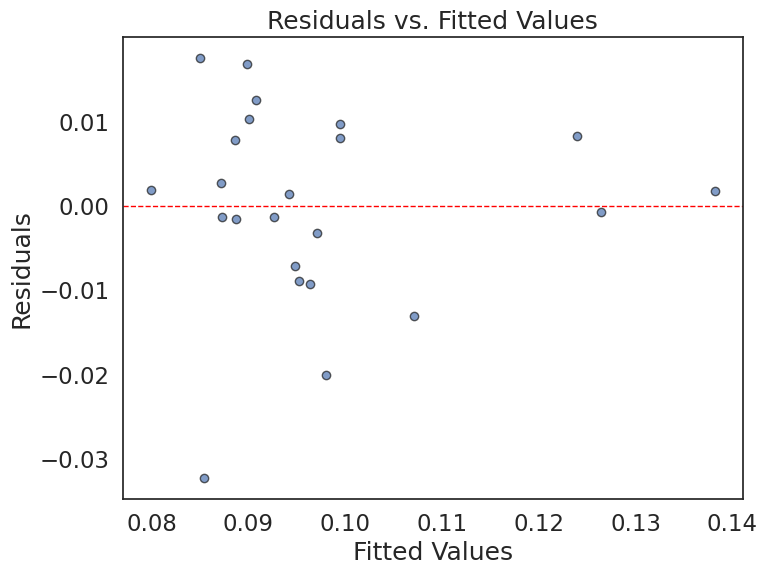

In [62]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = merged_df[['Amu Darya Non-growing', 'Amu Darya Growing', 'Syr Darya Non-growing', 'Syr Darya Growing']]
y = merged_df['NDVI']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The residuals vs. fitted values plot shows **some signs of heteroscedasticity**, as the spread of residuals increases with higher fitted values, forming a slight funnel shape. This suggests a potential violation of the homoscedasticity assumption. To address this, transformations (e.g., log transformation) could be considered, or the current model can be used with the limitation noted in the analysis.

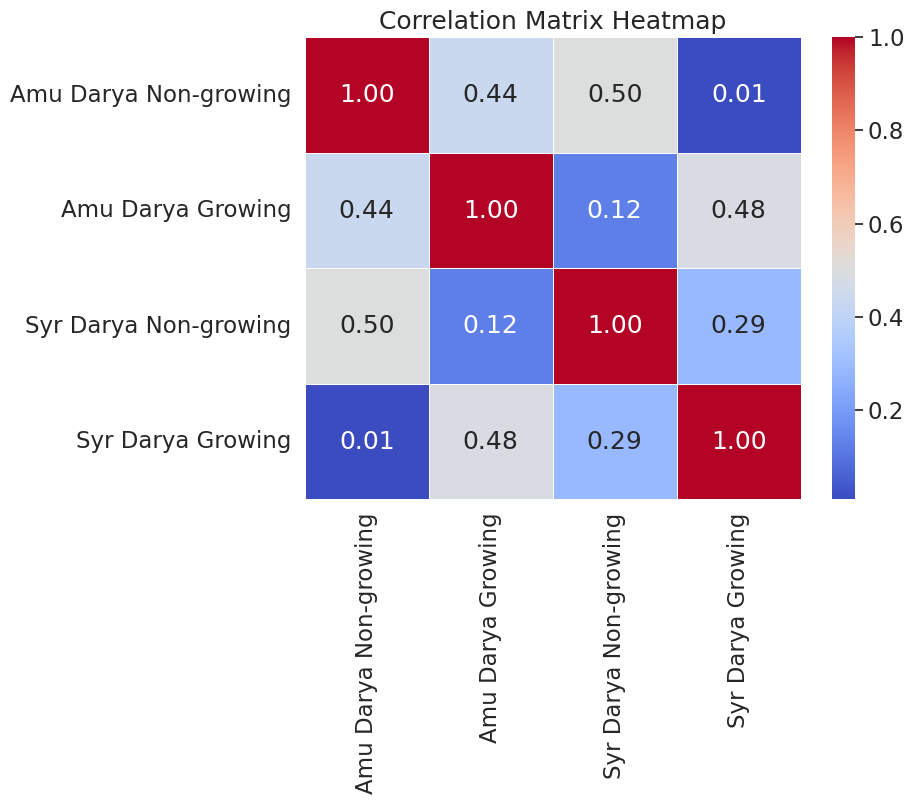

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['Amu Darya Non-growing', 'Amu Darya Growing', 'Syr Darya Non-growing', 'Syr Darya Growing']

correlation_matrix = merged_df[variables].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap shows the correlation between the variables. The correlations are moderate to low, with the highest being 0.50 between Amu Darya Non-growing and Syr Darya Non-growing, indicating no strong linear relationship between the variables. All correlations are below 0.8, suggesting that multicollinearity is not a significant issue in this dataset. Therefore, these variables can be safely used in the regression analysis without further adjustments for multicollinearity.









# 4. Regression

Given the dataset, there is no significant multicollinearity issue as indicated by the correlation heatmap, with all correlation coefficients below 0.8. However, potential challenges related to dependence and heteroscedasticity remain. The chronological order of the data suggests possible dependence, where residuals may exhibit autocorrelation. Additionally, the residuals vs. fitted values plot hints at potential heteroscedasticity, where the variance of residuals is not constant.

Despite these concerns, **We will proceed with an initial OLS analysis to explore the relationships between variables.** Following the regression, diagnostic tests such as the Durbin-Watson test for dependence and visual inspections of residual patterns will be conducted. If significant violations of assumptions are detected, appropriate adjustments will be made, such as using panel regression or robust standard errors to improve model reliability.

NDVI = β0 + β1 * Amudarya_NonGrowing_Season + β2 * Amudarya_NonGrowing_Season + β3 * Syrdarya_Growing_Season + β4 * Amudarya_Growing_Actual + ε

*   NDVI: The dependent variable
*   Amudarya_NonGrowing_Season: The first predictor variable
*   mudarya_Growing_Season: The second predictor variable
*   Amudarya_Growing_Actua:  The third predictor variable
*   mudarya_Growing_Actual: The forth predictor variable


In [64]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
Amudarya_NonGrowing_Season = df_waterinflow['Amu Darya Non-growing']
Amudarya_Growing_Season = df_waterinflow['Amu Darya Growing']
Syrdarya_NonGrowing_Season = df_waterinflow['Syr Darya Non-growing']
Syrdarya_Growing_Season = df_waterinflow['Syr Darya Growing']
NDVI=merged_df['NDVI']

model = ols('NDVI ~ Amudarya_NonGrowing_Season + Amudarya_Growing_Season + Syrdarya_NonGrowing_Season + Syrdarya_Growing_Season ', data=merged_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     6.720
Date:                Sun, 19 Jan 2025   Prob (F-statistic):            0.00172
Time:                        18:58:30   Log-Likelihood:                 70.232
No. Observations:                  23   AIC:                            -130.5
Df Residuals:                      18   BIC:                            -124.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

The coefficient for Amudarya_NonGrowing_Season is -0.0025, indicating a negative relationship with NDVI, but it is not statistically significant (p = 0.361).

The coefficient for Amudarya_Growing_Season is -0.0032, indicating a negative relationship with NDVI, but it is not statistically significant (p = 0.253).

The coefficient for Syrdarya_NonGrowing_Season is 0.0007, indicating a positive relationship with NDVI, but it is not statistically significant (p = 0.714).

The coefficient for Syrdarya_Growing_Season is 0.0085, indicating a significant positive relationship with NDVI (p = 0.001).

The R-squared value is 0.599, suggesting that the model explains 59.9% of the variation in NDVI. The overall model is significant (F-statistic p = 0.00172), indicating a good fit.

The results suggest that among the variables, only Syrdarya inflow during the growing season has a statistically significant positive impact on NDVI, while other variables do not show significant effects.

**Two main reasons:**

Potential Collinearity: Growing and non-growing season inflows may exhibit some degree of collinearity, which can dilute the individual significance of these variables in the regression model.

Counteracting Effects: The seasonal inflows might have opposing impacts on NDVI, partially canceling each other out when analyzed separately, leading to reduced significance.

In [69]:
!pip install statsmodels pandas

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = ['Amu Darya Non-growing', 'Amu Darya Growing', 'Syr Darya Non-growing', 'Syr Darya Growing']

X = merged_df[variables]
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Variable        VIF
0                  const  40.111739
1  Amu Darya Non-growing   2.121145
2      Amu Darya Growing   2.015071
3  Syr Darya Non-growing   1.745086
4      Syr Darya Growing   1.799807


Using the Variance Inflation Factor (VIF) method, the results indicate that all variables have VIF values below 5, suggesting low multicollinearity. Therefore, the variables can be safely used in the regression model without concerns about instability caused by multicollinearity.